In [1]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt
import numpy as np
from galaxy_analysis.analysis import gas_abundance as GA
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.static_data import ISM # some pre-defined masks


/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 4

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:

#
# Test code to load a data set and then compute the gas
# phase mass fraction / abundance distribution for an arbitrarily
# defined mask
#
gal = Galaxy('DD0401', wdir = './../example_data/')        # load galaxy

Parsing Hierarchy : 100%|██████████| 3088/3088 [00:00<00:00, 23847.02it/s]
/home/aemerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 3088/3088 [00:00<00:00, 20136.43it/s]
/home/aemerick/code/onezone/data_tables.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [8]:
ISM['CNM'] + '&' + ISM['Molecular']

"(obj['temperature'].in_units('K') < 10**(2)) & (obj['H2_fraction'] <= 0.5)&(obj['temperature'].in_units('K') < 10**(2)) & (obj['H2_fraction'] > 0.5)"

In [19]:

# mask is just a boolean mask over the cells. This hould
# be easy to make arbitrarily complex things
data_source = gal.disk.cut_region(ISM['CNM'] + '+' + ISM['Molecular'])
#mask        = np.ones(np.shape(gal.disk['x']))

abundances = {}
nold = 0.0
for n in [10, 25, 50, 100, 150, 200, 1000]:
    mask          = (data_source['number_density'] > nold) * (data_source['number_density'] < n)
    abundances[n] = GA.compute_abundance_stats(gal.ds, data_source, mask = mask,
                               fraction_fields = ['O_Fraction','N_Fraction'])
    nold = n*1


10 -4.49063240996 0.191079109991
25 -4.50557095456 0.320503102144
50 -4.51612749862 0.36628870763
100 -4.5331247354 0.325750634452
150 -4.59169141424 0.276350543854
200 -4.6259387862 0.0750590123465
nothing for  1000


[]

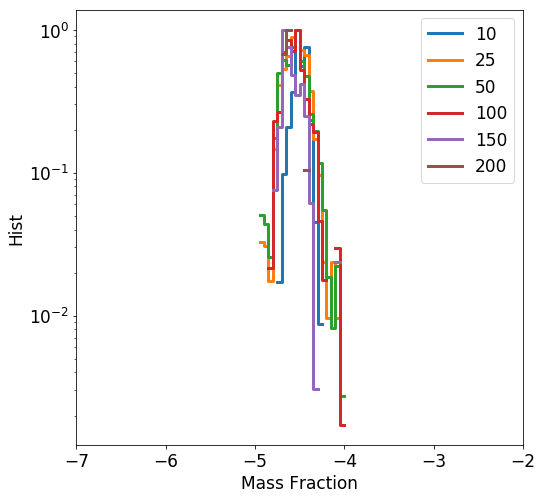

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

bins = abundances[ abundances.keys()[0] ]['mass_fraction']['bins']
dx   = bins[1:] - bins[:-1]

i = 0
for n in np.sort(abundances.keys()):
    hist = abundances[n]['mass_fraction']['O_Fraction']['hist']
    
    y = hist / dx
    if np.size(y[y>0]) == 0:
        print 'nothing for ', n
    else:
        plot_histogram(ax, np.log10(bins), y / np.max(y), color = 'C%i'%(i), label = str(n), lw = 3)
        d9 = np.log10(abundances[n]['mass_fraction']['O_Fraction']['decile_9'])
        d1 = np.log10(abundances[n]['mass_fraction']['O_Fraction']['decile_1'])

        print n, np.log10(abundances[n]['mass_fraction']['O_Fraction']['median']), d9-d1

    i = i + 1
    
ax.legend(loc='best')
ax.set_xlabel('Mass Fraction')
ax.set_ylabel('Hist')
ax.set_xlim(-7.0, -2)
ax.semilogy()

10 -5.86456369712 0.746463908137
25 -5.93220439414 0.987522025103
50 -5.98831987816 1.07745799273
100 -6.0317180902 0.970016068701
150 -6.05179130704 1.05882548243
200 -6.09188457599 0.347561009179
nothing for  1000


[]

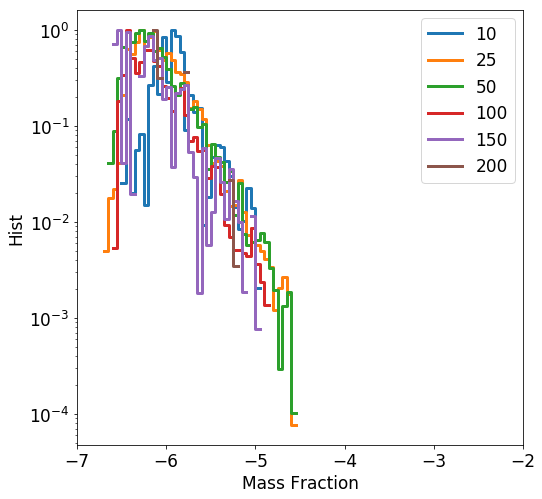

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

bins = abundances[ abundances.keys()[0] ]['mass_fraction']['bins']
dx   = bins[1:] - bins[:-1]

i = 0
for n in np.sort(abundances.keys()):
    hist = abundances[n]['mass_fraction']['N_Fraction']['hist']
    
    y = hist / dx
    if np.size(y[y>0]) == 0:
        print 'nothing for ', n
    else:
        plot_histogram(ax, np.log10(bins), y / np.max(y), color = 'C%i'%(i), label = str(n), lw = 3)
        d9 = np.log10(abundances[n]['mass_fraction']['N_Fraction']['decile_9'])
        d1 = np.log10(abundances[n]['mass_fraction']['N_Fraction']['decile_1'])

        print n, np.log10(abundances[n]['mass_fraction']['N_Fraction']['median']), d9-d1

    i = i + 1
    
ax.legend(loc='best')
ax.set_xlabel('Mass Fraction')
ax.set_ylabel('Hist')
ax.set_xlim(-7.0, -2)
ax.semilogy()

In [6]:
y.value

array(1.0)